In [1]:
from pathlib import Path
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import sys
sys.path.append('..')

import training

In [2]:
df_all = pd.read_csv('../reports/training_hyperparameters/results.csv')

## Inspect training progression

In [3]:
def get_experiment(opt, lr, ams, exp):
    return df_all[(df_all['optimizer'] == opt) & (df_all['learning_rate'] == lr) & 
                  (df_all['amsgrad'] == ams) & (df_all['exponential_decay'] == exp)]

def plot_experiment(experiment, ax=None, title=None):
    if not ax:
        ax = plt.subplot(111)
    for n in range(4):
        tmp = experiment[experiment['num'] == n]
        base = tmp[~tmp['ensemble']].dropna()
        ax.plot(range(1, 16), base['smape'], c='0.5', alpha=0.5)
        ens = tmp[tmp['ensemble']].dropna()
        ax.plot(range(1, 16), ens['smape'], c='C0', alpha=0.5)
        ax.scatter([15], list(experiment[experiment['epoch'].isna()]['smape']), c='C1', marker='x')
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.set_title(title)

In [4]:
adam_comb_dict = {'optimizer': ['adam'],
                  'learning_rate': [0.0001, 0.0005, 0.001, 0.005],
                  'amsgrad': [True, False],
                  'exp_decay': [True, False]}

combs = list(training.make_runs(adam_comb_dict))

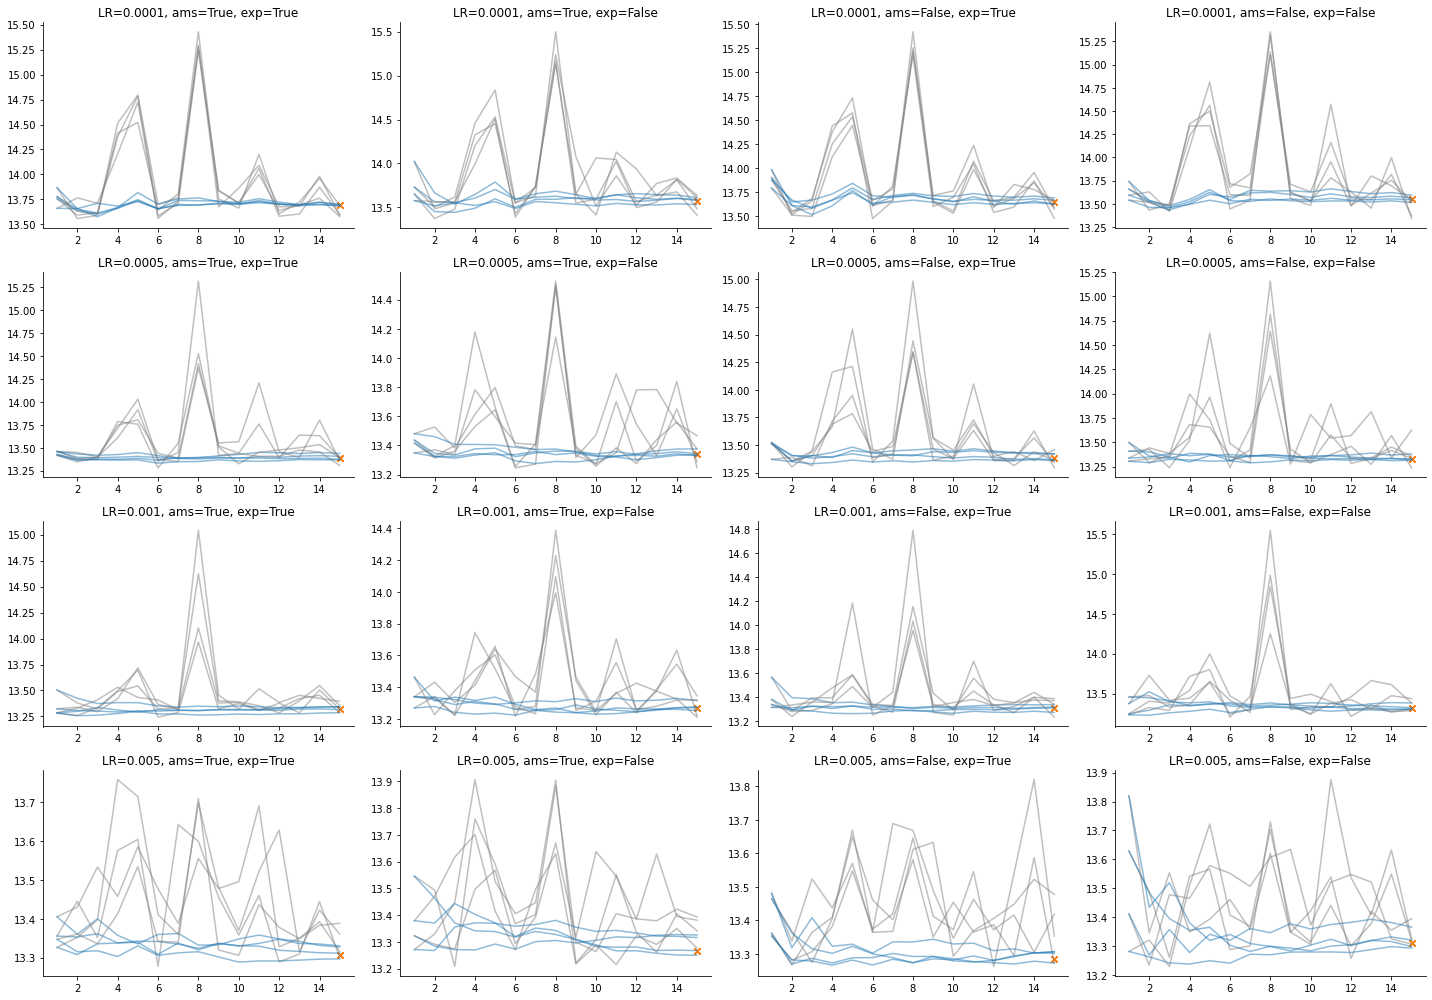

In [5]:
plt.figure(figsize=(20, 14))

for i in range(16):
    ax = plt.subplot(4, 4, i+1)
    opt = combs[i]['optimizer']
    lr = combs[i]['learning_rate']
    ams = combs[i]['amsgrad']
    exp = combs[i]['exp_decay']
    ex = get_experiment(opt, lr, ams, exp)
    title = 'LR={}, ams={}, exp={}'.format(lr, ams, exp)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()

In [6]:
df_all[df_all['ensemble']].sort_values('smape')

,optimizer,learning_rate,amsgrad,exponential_decay,num,epoch,ensemble,smape,mase*
2990,adam,0.05,False,True,NaN,14.0,True,13.157325,2.674375
2297,adam,0.10,False,True,NaN,1.0,True,13.169374,2.685705
2861,adam,0.05,False,True,1.0,3.0,True,13.199507,2.695521
2981,adam,0.05,False,True,NaN,5.0,True,13.203826,2.695231
2308,adam,0.10,False,True,NaN,12.0,True,13.204451,2.688343
...,...,...,...,...,...,...,...,...,...
2581,adam,0.50,False,True,NaN,13.0,True,199.294028,4217.145423
2541,adam,0.50,False,True,2.0,2.0,True,199.548433,6076.695826
2481,adam,0.50,False,True,3.0,2.0,True,199.730869,13584.741056
2539,adam,0.50,False,True,2.0,1.0,True,199.783328,12153.678322


In [11]:
adam_comb_dict_new = {'optimizer': ['adam'],
                      'learning_rate': [0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5],
                      'amsgrad': [False],
                      'exp_decay': [True]}

combs = list(training.make_runs(adam_comb_dict_new))

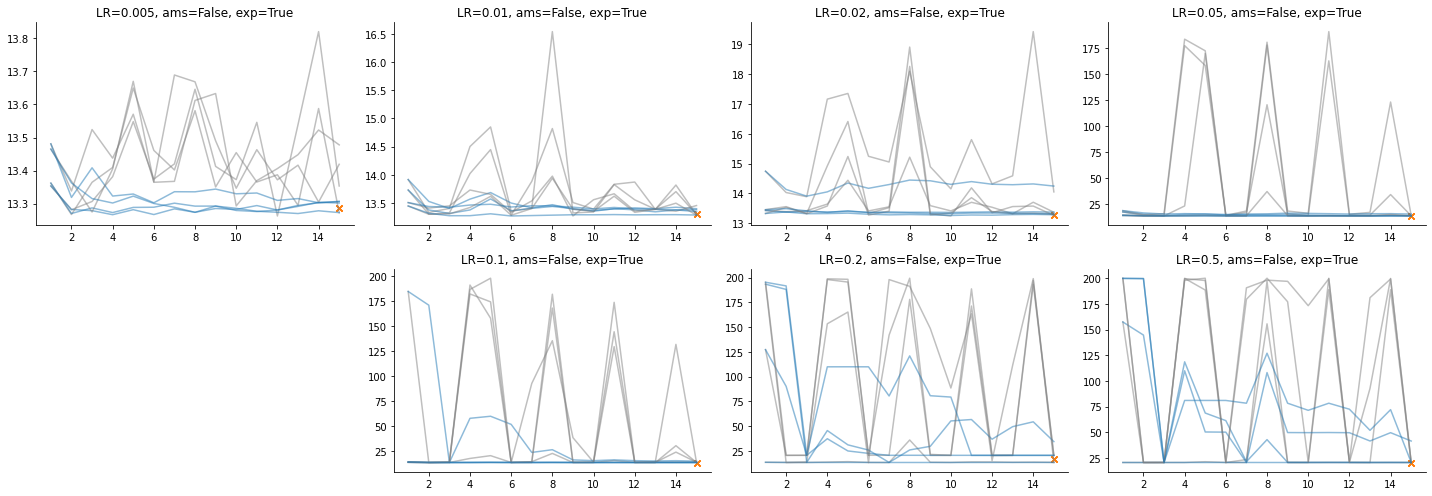

In [21]:
plt.figure(figsize=(20, 7))

scores = []

for i in range(7):
    if i < 4:
        j = i + 1
    else:
        j = i + 2
    
    ax = plt.subplot(2, 4, j)
    opt = combs[i]['optimizer']
    lr = combs[i]['learning_rate']
    ams = combs[i]['amsgrad']
    exp = combs[i]['exp_decay']
    ex = get_experiment(opt, lr, ams, exp)
    title = 'LR={}, ams={}, exp={}'.format(lr, ams, exp)
    plot_experiment(ex, ax=ax, title=title)
    
    scores.append(ex[ex['epoch'].isna()]['smape'].iloc[0])
    
plt.tight_layout()

/home/thanos/.envs/aug/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  This is separate from the ipykernel package so we can avoid doing imports until


(13.0, 14.0)

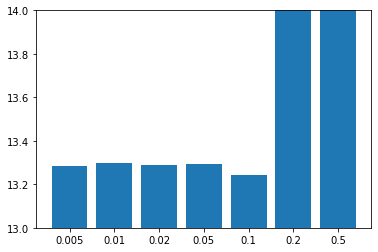

In [30]:
ax = plt.subplot(111)
ax.bar(range(7), scores)
ax.set_xticklabels(['', '0.005', '0.01', '0.02', '0.05', '0.1', '0.2', '0.5'])
ax.set_ylim([13, 14])

In [15]:
df_all[(df_all['epoch'].isna()) & (df_all['learning_rate'] >= 0.005)]

,optimizer,learning_rate,amsgrad,exponential_decay,num,epoch,ensemble,smape,mase*
1767,adam,0.005,False,False,NaN,NaN,True,13.309715,2.708384
1903,adam,0.005,False,True,NaN,NaN,True,13.285963,2.711503
2039,adam,0.005,True,False,NaN,NaN,True,13.264372,2.704318
2175,adam,0.005,True,True,NaN,NaN,True,13.306993,2.714472
2311,adam,0.100,False,True,NaN,NaN,True,13.243811,2.706144
2447,adam,0.200,False,True,NaN,NaN,True,17.183888,3.356533
2583,adam,0.500,False,True,NaN,NaN,True,20.533918,4.116508
2719,adam,0.010,False,True,NaN,NaN,True,13.299870,2.712504
2855,adam,0.020,False,True,NaN,NaN,True,13.288333,2.714031
2991,adam,0.050,False,True,NaN,NaN,True,13.295391,2.709826


## RMSprop

In [9]:
df_rms = pd.read_csv('../reports/training_hyperparameters/rmsprop/results.csv')

In [20]:
def get_experiment_rms(opt, lr, exp):
    return df_rms[(df_rms['optimizer'] == opt) & (df_rms['learning_rate'] == lr)
                  & (df_rms['exponential_decay'] == exp)]

rms_comb_dict = {'optimizer': ['rmsprop'],
                  'learning_rate': [0.0001, 0.0005, 0.001, 0.005],
                  'exp_decay': [True, False]}

combs = list(training.make_runs(rms_comb_dict))

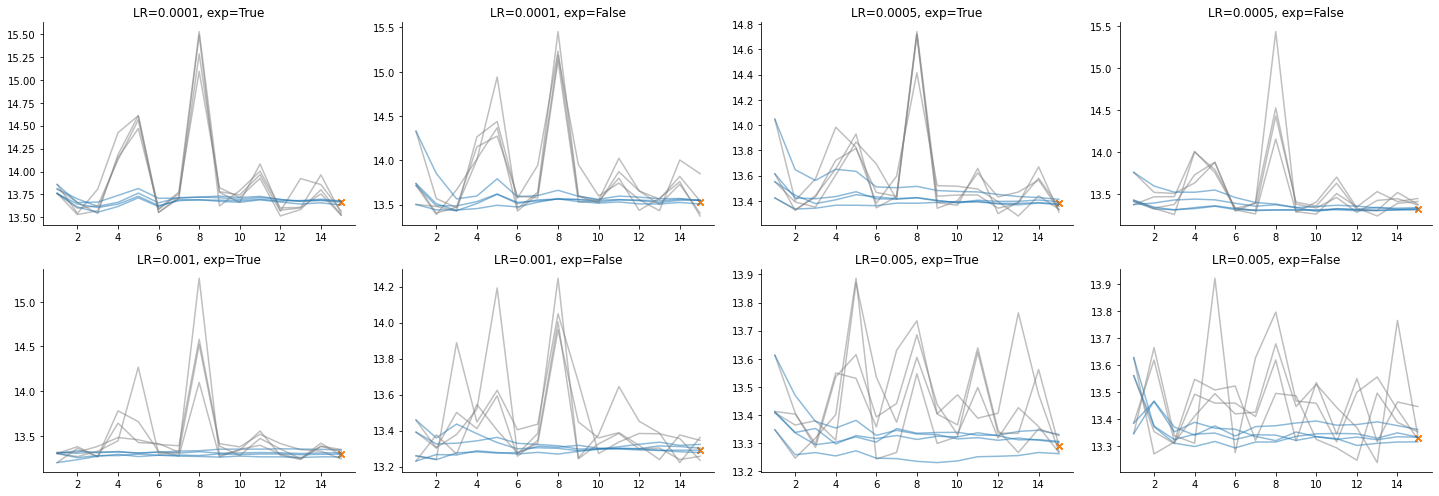

In [22]:
plt.figure(figsize=(20, 7))

for i in range(len(combs)):
    ax = plt.subplot(2, 4, i+1)
    opt = combs[i]['optimizer']
    lr = combs[i]['learning_rate']
    exp = combs[i]['exp_decay']
    ex = get_experiment_rms(opt, lr, exp)
    title = 'LR={}, exp={}'.format(lr, exp)
    plot_experiment(ex, ax=ax, title=title)
    
plt.tight_layout()